# Neural Networks

In [5]:
!pip install keras
!pip install tensorflow

  Using cached tensorboard-2.8.0-py3-none-any.whl (5.8 MB)
  Using cached tf_estimator_nightly-2.8.0.dev2021122109-py2.py3-none-any.whl (462 kB)
  Using cached absl_py-1.0.0-py3-none-any.whl (126 kB)
  Using cached termcolor-1.1.0.tar.gz (3.9 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached flatbuffers-2.0-py2.py3-none-any.whl (26 kB)
  Using cached gast-0.5.3-py3-none-any.whl (19 kB)
  Using cached Markdown-3.3.6-py3-none-any.whl (97 kB)
  Using cached tensorboard_plugin_wit-1.8.1-py3-none-any.whl (781 kB)
  Using cached tensorboard_data_server-0.6.1-py3-none-any.whl (2.4 kB)
  Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any.whl (18 kB)
  Using cached pyasn1_modules-0.2.8-py2.py3-none-any.whl (155 kB)
  Using cached cachetools-5.0.0-py3-none-any.whl (9.1 kB)
  Us

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV, KFold
import numpy as np
import pandas as pd

In [7]:
fores_data = pd.read_csv('forestfires.csv')
fores_data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [8]:
fores_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [9]:
fores_data.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
scaler = StandardScaler()

In [11]:
fores_data['month'] = le.fit_transform(fores_data['month'])
fores_data['day'] = le.fit_transform(fores_data['day'])
fores_data['size_category'] = le.fit_transform(fores_data['size_category'])

In [12]:
X= fores_data.drop('size_category',axis=1)
Y=fores_data['size_category']

In [13]:
X_scaled = scaler.fit_transform(X)

In [14]:
#Neural Network Model
model = Sequential()
model.add(Dense(12,kernel_initializer='uniform',activation='relu'))
model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
model.fit(X, Y, validation_split=0.33,epochs=150, batch_size=10)

Epoch 1/150
35/35 [==============================] - 1s 9ms/step - loss: 0.6042 - accuracy: 0.7572 - val_loss: 0.6554 - val_accuracy: 0.6784
Epoch 2/150
35/35 [==============================] - 0s 2ms/step - loss: 0.5559 - accuracy: 0.7572 - val_loss: 0.6568 - val_accuracy: 0.6784
Epoch 3/150
35/35 [==============================] - 0s 2ms/step - loss: 0.5493 - accuracy: 0.7572 - val_loss: 0.6533 - val_accuracy: 0.6842
Epoch 4/150
35/35 [==============================] - 0s 2ms/step - loss: 0.5372 - accuracy: 0.7601 - val_loss: 0.6018 - val_accuracy: 0.6901
Epoch 5/150
35/35 [==============================] - 0s 2ms/step - loss: 0.5050 - accuracy: 0.7688 - val_loss: 0.6048 - val_accuracy: 0.7018
Epoch 6/150
35/35 [==============================] - 0s 2ms/step - loss: 0.4790 - accuracy: 0.7803 - val_loss: 0.6369 - val_accuracy: 0.7193
Epoch 7/150
35/35 [==============================] - 0s 2ms/step - loss: 0.4395 - accuracy: 0.8064 - val_loss: 0.4917 - val_accuracy: 0.7719
Epoch 8/150
3

Epoch 59/150
35/35 [==============================] - 0s 2ms/step - loss: 0.0241 - accuracy: 0.9884 - val_loss: 0.1005 - val_accuracy: 0.9415
Epoch 60/150
35/35 [==============================] - 0s 2ms/step - loss: 0.0221 - accuracy: 0.9913 - val_loss: 0.0774 - val_accuracy: 0.9591
Epoch 61/150
35/35 [==============================] - 0s 2ms/step - loss: 0.0182 - accuracy: 0.9942 - val_loss: 0.0795 - val_accuracy: 0.9825
Epoch 62/150
35/35 [==============================] - 0s 2ms/step - loss: 0.0155 - accuracy: 0.9971 - val_loss: 0.0818 - val_accuracy: 0.9474
Epoch 63/150
35/35 [==============================] - 0s 2ms/step - loss: 0.0159 - accuracy: 0.9971 - val_loss: 0.1059 - val_accuracy: 0.9474
Epoch 64/150
35/35 [==============================] - 0s 3ms/step - loss: 0.0736 - accuracy: 0.9798 - val_loss: 0.1023 - val_accuracy: 0.9591
Epoch 65/150
35/35 [==============================] - 0s 2ms/step - loss: 0.0340 - accuracy: 0.9884 - val_loss: 0.0901 - val_accuracy: 0.9474
Epoch 

35/35 [==============================] - 0s 2ms/step - loss: 0.0363 - accuracy: 0.9855 - val_loss: 0.1249 - val_accuracy: 0.9591
Epoch 117/150
35/35 [==============================] - 0s 2ms/step - loss: 0.0064 - accuracy: 1.0000 - val_loss: 0.0981 - val_accuracy: 0.9591
Epoch 118/150
35/35 [==============================] - 0s 2ms/step - loss: 0.0265 - accuracy: 0.9855 - val_loss: 0.0977 - val_accuracy: 0.9708
Epoch 119/150
35/35 [==============================] - 0s 2ms/step - loss: 0.0168 - accuracy: 0.9971 - val_loss: 0.0925 - val_accuracy: 0.9766
Epoch 120/150
35/35 [==============================] - 0s 3ms/step - loss: 0.0208 - accuracy: 0.9942 - val_loss: 0.2119 - val_accuracy: 0.9181
Epoch 121/150
35/35 [==============================] - 0s 2ms/step - loss: 0.0436 - accuracy: 0.9798 - val_loss: 0.1210 - val_accuracy: 0.9591
Epoch 122/150
35/35 [==============================] - 0s 3ms/step - loss: 0.0427 - accuracy: 0.9855 - val_loss: 0.0938 - val_accuracy: 0.9649
Epoch 123/150

In [15]:
score = model.evaluate(X,Y)

17/17 [==============================] - 0s 1ms/step - loss: 0.0435 - accuracy: 0.9845


In [16]:
model.metrics_names[1], score[1]*100

('accuracy', 98.45260977745056)

In [17]:
h=model.fit(x=X, y=Y, verbose=1,batch_size=50,epochs=500,shuffle='true')

Epoch 1/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0739 - accuracy: 0.9787
Epoch 2/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0443 - accuracy: 0.9845
Epoch 3/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0403 - accuracy: 0.9865
Epoch 4/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0453 - accuracy: 0.9845
Epoch 5/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0321 - accuracy: 0.9865
Epoch 6/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0343 - accuracy: 0.9865
Epoch 7/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0315 - accuracy: 0.9903
Epoch 8/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0372 - accuracy: 0.9884
Epoch 9/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0349 - accuracy: 0.9845
Epoch 10/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0317 - accuracy: 0.9903
Epoch 11/

11/11 [==============================] - 0s 1ms/step - loss: 0.0279 - accuracy: 0.9903
Epoch 84/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0260 - accuracy: 0.9903
Epoch 85/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0203 - accuracy: 0.9942
Epoch 86/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0231 - accuracy: 0.9884
Epoch 87/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0246 - accuracy: 0.9903
Epoch 88/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0187 - accuracy: 0.9942
Epoch 89/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0185 - accuracy: 0.9884
Epoch 90/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0212 - accuracy: 0.9903
Epoch 91/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0216 - accuracy: 0.9923
Epoch 92/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0197 - accuracy: 0.9923
Epoch 93/500


11/11 [==============================] - 0s 1ms/step - loss: 0.0109 - accuracy: 0.9981
Epoch 165/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0158 - accuracy: 0.9942
Epoch 166/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0129 - accuracy: 0.9961
Epoch 167/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0139 - accuracy: 0.9942
Epoch 168/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0113 - accuracy: 0.9981
Epoch 169/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0105 - accuracy: 0.9981
Epoch 170/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0118 - accuracy: 0.9942
Epoch 171/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0124 - accuracy: 0.9961
Epoch 172/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0292 - accuracy: 0.9884
Epoch 173/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0256 - accuracy: 0.9923
Epoc

11/11 [==============================] - 0s 1ms/step - loss: 0.0136 - accuracy: 0.9942
Epoch 246/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0103 - accuracy: 0.9942
Epoch 247/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0168 - accuracy: 0.9884
Epoch 248/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0138 - accuracy: 0.9961
Epoch 249/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0157 - accuracy: 0.9942
Epoch 250/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0223 - accuracy: 0.9903
Epoch 251/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0493 - accuracy: 0.9749
Epoch 252/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0160 - accuracy: 0.9923
Epoch 253/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0091 - accuracy: 0.9981
Epoch 254/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0103 - accuracy: 0.9961
Epoc

11/11 [==============================] - 0s 1ms/step - loss: 0.0061 - accuracy: 1.0000
Epoch 327/500
11/11 [==============================] - 0s 2ms/step - loss: 0.0050 - accuracy: 1.0000
Epoch 328/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0051 - accuracy: 1.0000
Epoch 329/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0050 - accuracy: 1.0000
Epoch 330/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0063 - accuracy: 0.9981
Epoch 331/500
11/11 [==============================] - 0s 2ms/step - loss: 0.0182 - accuracy: 0.9923
Epoch 332/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0246 - accuracy: 0.9826
Epoch 333/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0583 - accuracy: 0.9807
Epoch 334/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0137 - accuracy: 0.9942
Epoch 335/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0055 - accuracy: 1.0000
Epoc

11/11 [==============================] - 0s 1ms/step - loss: 0.0133 - accuracy: 0.9942
Epoch 408/500
11/11 [==============================] - 0s 2ms/step - loss: 0.0132 - accuracy: 0.9903
Epoch 409/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0094 - accuracy: 0.9961
Epoch 410/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0094 - accuracy: 0.9961
Epoch 411/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0088 - accuracy: 0.9961
Epoch 412/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0066 - accuracy: 1.0000
Epoch 413/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0043 - accuracy: 1.0000
Epoch 414/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0038 - accuracy: 1.0000
Epoch 415/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0055 - accuracy: 0.9981
Epoch 416/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0038 - accuracy: 1.0000
Epoc

11/11 [==============================] - 0s 1ms/step - loss: 0.0039 - accuracy: 0.9981
Epoch 489/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0035 - accuracy: 1.0000
Epoch 490/500
11/11 [==============================] - 0s 2ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 491/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0023 - accuracy: 1.0000
Epoch 492/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0028 - accuracy: 1.0000
Epoch 493/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0032 - accuracy: 1.0000
Epoch 494/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0041 - accuracy: 1.0000
Epoch 495/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 496/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 497/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0036 - accuracy: 1.0000
Epoc

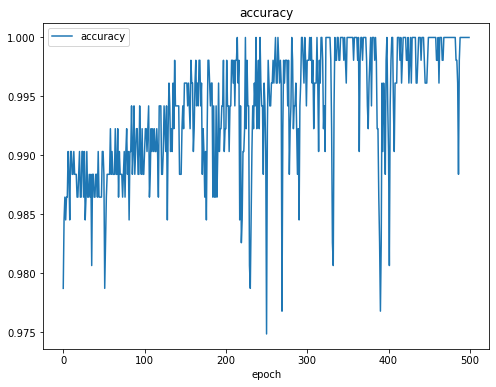

In [18]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.plot(h.history['accuracy'])
plt.title('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy']);

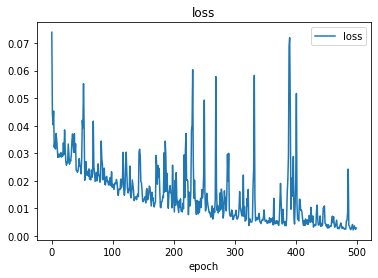

In [19]:
# summarize history for loss
import matplotlib.pyplot as plt
plt.plot(h.history['loss'])
plt.title('loss')
plt.xlabel('epoch')
plt.legend(['loss']);